In [2]:
%pylab
%matplotlib inline

import cnvmats
import cv2

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


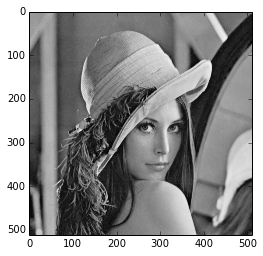

In [3]:
x = cv2.imread('lena.png', 0)
imshow(x, 'gray')

In [4]:
sa = (20,20)
sx = x.shape

X = cnvmats.cnvmat(x, sa, 'valid')

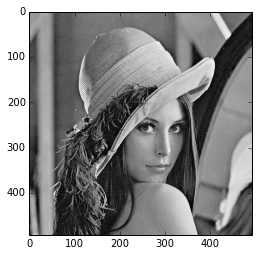

In [5]:
kronecker = zeros(sa)
kronecker[10,10] = 1

y_kron =X.dot(kronecker)
imshow(y_kron, 'gray')

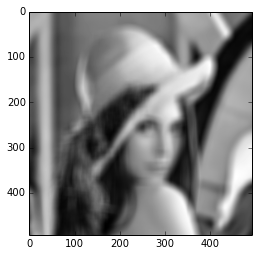

In [6]:
boxfilter = ones(sa) / prod(sa)

y_box = X.dot(boxfilter)
imshow(y_box, 'gray')

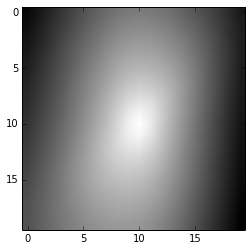

In [7]:
imshow(X.T.dot(y_kron), 'gray')

In [8]:
Boxfilter = cnvmats.cnvmat(boxfilter, sx, 'valid')
linalg.norm(Boxfilter.dot(x) - X.dot(boxfilter))

0.0

$\left\| \mathrm P_X y \right\|^2 = y^\mathsf{T} X \left(X^\mathsf{T} X\right)^{-1} X^\mathsf{T} y$

In [9]:
XTXinv = linalg.inv(X.T.dot(X))

def proj_norm_sq(y):
    XTy = X.T.dot(y).flat[:]
    return XTy.T.dot(XTXinv).dot(XTy)

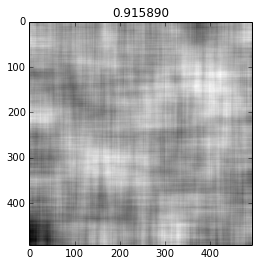

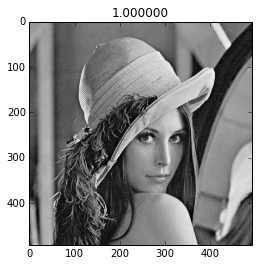

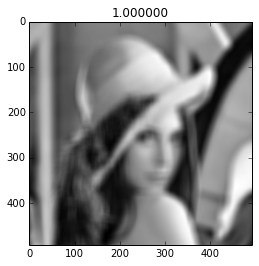

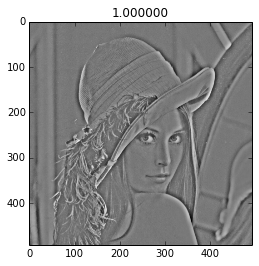

In [10]:
def similarity(y):
    return proj_norm_sq(y / linalg.norm(y))

y_other = cv2.blur(255 * random.random(X.sh), (100,100))

figure()
imshow(y_other, 'gray')
title('%f' % similarity(y_other))

figure()
imshow(y_kron, 'gray')
title('%f' % similarity(y_kron))

figure()
imshow(y_box, 'gray')
title('%f' % similarity(y_box))

figure()
imshow(y_kron - y_box, 'gray')
title('%f' % similarity(y_kron - y_box))